$HI$  
       Here I am Testing BackTrader Module

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import pandas as pd 
import numpy as np
import tkinter
# matplotlib.use("tkagg")
from backtesting.lib import crossover

/home/nimac/.local/lib/python3.6/site-packages/backtesting/_plotting.py:37: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [4]:
from models.data_provider import DataModel
dm=DataModel("../xcels",["master0.csv","master1.csv"])
dm.read()

In [391]:
df=dm.get(dm.TA_SYMBOLS[0],"1390-01-01")

In [392]:
df.columns=['symbol', 'name', 'amount', 'volume', 'value', 'lastday', 'open1',
       'close1', 'last-change', 'last-percent', 'ending', 'ending-change',
       'ending-percent', 'min', 'max', 'year', 'month', 'day', 'diff_min_max',
       'diff_open', 'low', 'high', 'close', 'open',
       'adj_ending', 'log_adj_open', 'log_adj_close', 'log_adj_ending',
       'log_adj_min', 'log_adj_max', 'adj_scale']

In [393]:
x=[]
# x.append([2,3])
len(x)

0

In [394]:
import talib

In [395]:
cerebro.broker.get_fundvalue()

129.46497528

In [412]:
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

buys=[]
sells=[]
data_arr=[]
class MyStrategy(bt.Strategy):
    params = (('period', 20),)
    prices=[]
    counter=0
    sell_history=[]
    sell_days=[]
    last_trade_price=0
    buy_history=[]
    buy_days=[]
    buy_avg=0
    
    def __init__(self):
        self.sma=bt.talib.SMA(self.data.close, timeperiod=25, plotname='TA_SMA')
        
    def stock_inv(self,price):
        current_cash=cerebro.broker.get_cash()
        value=cerebro.broker.get_value()
        stock_inventory=((value-current_cash)/price)
        
        return stock_inventory
        
    def sell_func(self,amount,price,day):
        stock_inventory=self.stock_inv(price)
        print("before sell   :",stock_inventory)
        if(amount<stock_inventory):
            self.sell(size=amount)
            MyStrategy.last_trade_price=price
            MyStrategy.sell_history.append([price,amount])
            MyStrategy.sell_days.append(day)
            stock_inventory=self.stock_inv(price)
            print("after sell   :",stock_inventory)
  
    def buy_func(self,amount,price,day):
        
        stock_inventory=self.stock_inv(price)
#         print("buy:   ",stock_inventory)
        self.buy(size=amount)
        MyStrategy.last_trade_price=price
        MyStrategy.buy_history.append([price,amount])
        MyStrategy.buy_days.append(day)
        MyStrategy.buy_avg=np.average([MyStrategy.buy_avg,price],weights=[stock_inventory,amount])
        stock_inventory=self.stock_inv(price)
        
            
            
            
        
    def next(self):
        MyStrategy.counter+=1
        last_close=self.data.close[0]
        MyStrategy.prices.append(last_close)
        amount=int((cerebro.broker.cash/5)/last_close)
#         amount=int((cerebro.broker.get_cash()/20)/last_close)


        current_cash=cerebro.broker.get_cash()
        value=cerebro.broker.get_value()
        stock_inventory=((value-current_cash)/last_close)
        
        data_arr.append(self.data.close[0])

        # if it was the first day
        if(len(MyStrategy.buy_history)==0):
            self.buy(size=amount)
            MyStrategy.last_trade_price=last_close
            print(amount)
            MyStrategy.buy_history.append([last_close,amount])
            MyStrategy.buy_days.append(1)
            MyStrategy.buy_avg=last_close
        
                                    
        else:
            if(last_close>MyStrategy.buy_avg):
                if(last_close<MyStrategy.last_trade_price*0.95):
                    self.buy_func(amount,last_close,MyStrategy.counter)
                elif(last_close>self.last_trade_price*1.05):
                    self.sell_func(amount,last_close,MyStrategy.counter)
                    
                    
            
            elif(last_close<MyStrategy.buy_avg):
                if(last_close<MyStrategy.last_trade_price*0.95):
                    self.buy_func(amount,price=last_close,day=MyStrategy.counter)
                
                
                
#             if(stock_inventory>amount):
#                 self.sell(size=amount)

            
           
            
            
# #             اینجا میخوایم بفهمیم که الان قیمت بالای میانگین خریده یا نه .فقط وقتی تغییر میکنه که خرید انجام بشه پس خط زیر بلافاصله بعد از هر خرید میاد
#             buy_avg=np.average([buy_avg,last_close],weights=[stock_inventory,amount]
            

#             print(stock)
#             current=cerebro.broker.get_fundvalues.
#         else:
#             buy_avg=np.average(self.buy_history[:,0],weights=self.buy_history[:,1])
#             if(last_close<buy_avg):
#                 loss_percent=(buy_avg-last_close)/buy_av----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------g
                
#                 amount=(loss_percent//5)*np.sum(self.buy_history[:,1])
#                 if(amo):
#                     self.buy(size=amount)
                


#             if(last_close>buy_avg):
#                 pass
                
    
            

#         if(data.close[0]<np.average(data_arr[:,0],weights=data_arr[:,1])):
            
#         elif:
            
        
        
#         if(crossover(data.close,self.sma)):
#             self.sell()
# Print out the starting conditions

# Create a cerebro entity
cerebro = bt.Cerebro()
cerebro.broker.setcommission(commission=0.015)
data = bt.feeds.PandasData(dataname=df)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Set our cash start
cerebro.broker.setcash(10000000.0)
    
# Add a strategy
cerebro.addstrategy(MyStrategy)
# Run over everything
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
x=cerebro.broker.cash
cerebro.run()
y=cerebro.broker.getvalue()
# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
print("final_cash=", cerebro.broker.get_cash())
z=cerebro.broker.get_cash()
MyStrategy.counter

Starting Portfolio Value: 10000000.00
7556
before sell   : 7556.000000000004
after sell   : 7556.000000000004
before sell   : 31062.999999999996
after sell   : 31062.999999999996
before sell   : 43728.0
after sell   : 43728.0
before sell   : 43788.0
after sell   : 43788.0
before sell   : 43622.0
after sell   : 43622.0
before sell   : 43673.0
after sell   : 43673.0
before sell   : 43500.0
after sell   : 43500.0
before sell   : 43307.0
after sell   : 43307.0
before sell   : 43092.0
after sell   : 43092.0
before sell   : 43675.0
after sell   : 43675.0
before sell   : 43495.0
after sell   : 43495.0
before sell   : 43293.0
after sell   : 43293.0
before sell   : 43828.0
after sell   : 43828.0
before sell   : 43881.0
after sell   : 43881.0
before sell   : 43923.0
after sell   : 43923.0
before sell   : 43776.0
after sell   : 43776.0
before sell   : 43611.0
after sell   : 43611.0
before sell   : 43423.0
after sell   : 43423.0
before sell   : 43209.0
after sell   : 43209.0
before sell   : 42966.

1847

In [407]:
x=[row[0] for row in MyStrategy.buy_history]
y=[row[0] for row in MyStrategy.sell_history]


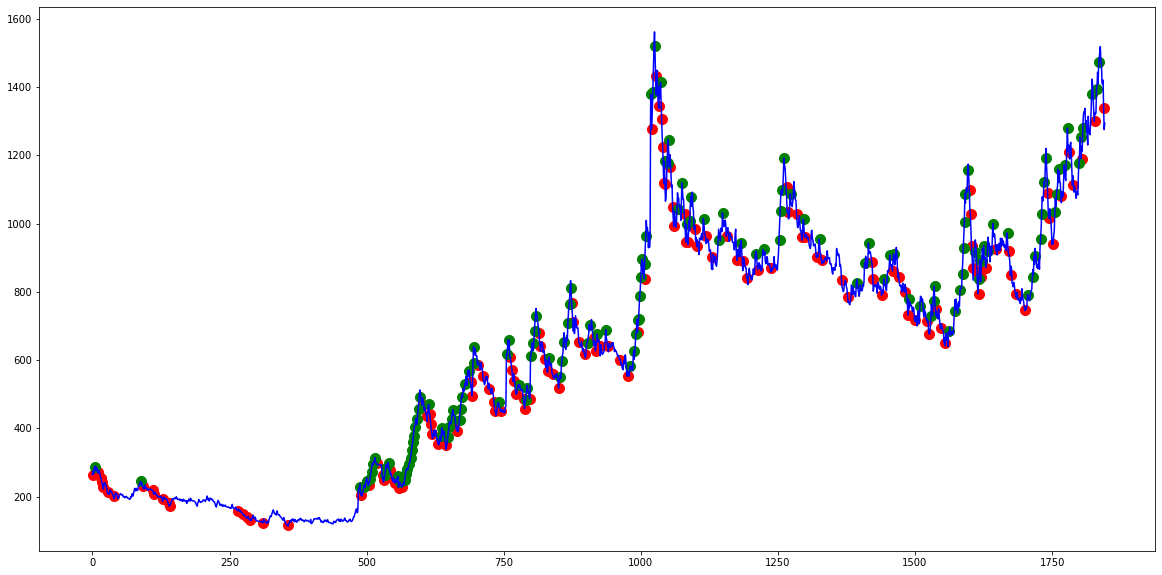

139


In [408]:
plt.figure(figsize=(20,10))
plt.scatter(MyStrategy.buy_days,x,c='r',s=100)
plt.scatter(MyStrategy.sell_days,y,c='g',s=100)
plt.plot(np.arange(len(MyStrategy.prices)),MyStrategy.prices,c='b')
plt.show()
print(len(x))

In [409]:
MyStrategy.buy_avg

306.1892788478541

In [354]:
# plt.plot(MyStrategy.buy_days,MyStrategy.buy_history[:,0])



[[516.3680808080808, 3873],
 [512.0323232323232, 3709],
 [552.3, 3331],
 [515.9, 2854],
 [477.4, 2456],
 [451.49999999999994, 2086],
 [609.0, 1745],
 [569.8, 1474],
 [537.5999999999999, 1249],
 [501.2, 1070],
 [486.49999999999994, 1046],
 [457.79999999999995, 886],
 [487.2, 799],
 [680.4, 944],
 [641.9, 798],
 [604.8, 677],
 [567.6999999999999, 576],
 [560.0, 556],
 [518.0, 481],
 [767.9, 780],
 [711.1999999999999, 672],
 [651.6999999999999, 588],
 [618.8, 495],
 [665.0, 527],
 [627.1999999999999, 447],
 [641.9, 416],
 [641.1999999999999, 400],
 [600.5999999999999, 340],
 [553.0, 293],
 [681.0999999999999, 392],
 [837.9, 524],
 [1275.3999999999999, 473],
 [1430.8, 489],
 [1345.3999999999999, 419],
 [1305.5, 409],
 [1223.6, 347],
 [1117.8999999999999, 303],
 [1115.1, 288],
 [1165.5, 316],
 [1048.6, 280],
 [991.9, 236],
 [1028.3, 261],
 [945.6999999999999, 227],
 [945.6999999999999, 218],
 [983.4999999999999, 241],
 [933.0999999999999, 203],
 [962.4999999999999, 188],
 [900.9, 160],
 [96

In [1]:
import backtrader as bt 

In [14]:
data1 = bt.feeds.PandasData(dataname=df)



In [10]:
df.head()

AttributeError: 'LineBuffer' object has no attribute 'head'

In [31]:
x = data1.datafields
data1.load()

AttributeError: 'Lines_LineSeries_DataSeries_OHLC_OHLCDateTime_Abst' object has no attribute '_idx'